# Analysis of the Irmin tree of block level 2,056,194
### which is the second block of cycle 445 (created on Jan 23, 2022)




In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from custom_plot_tools import plot_vertical_bubble_histo

### Summary
```
Number of bytes: 2,481,531,251. Breakdown:
  -  26% 633,552,768B in 32 byte hash of objects,
  -  40% 993,446,285B in hard coded steps (a.k.a. direct step),
  -  34% 854,532,198B elsewhere (i.e. length segment + value segment).

Number of objects: 19,798,524 (a.k.a. pack file entries). Breakdown:
  -  44%  8,616,715 contents (a.k.a. blobs),
  -  37%  7,295,166 nodes (a.k.a. root inodes),
  -  20%  3,886,643 hidden nodes (a.k.a. non-root inodes).

Number of steps: 33,506,370 (i.e. number of directories). Breakdown:
  -  80% 26,898,128 by direct references (i.e. parent records hard coded step),
  -  20%  6,608,242 by indirect references (i.e. parent records "dict" id),
```
Side note: The difference between `directories` and `objects` is due to sharing of objects, i.e. may objects are referenced by several paths.



### Objects Kind

The following plot groups the objects into 10 categories:
- 4 categories for contents, depending on their size,
- 5 categories for inodes, depending on the size of the node they belong to,
- 1 extra category for inodes that appear in several categories at once.


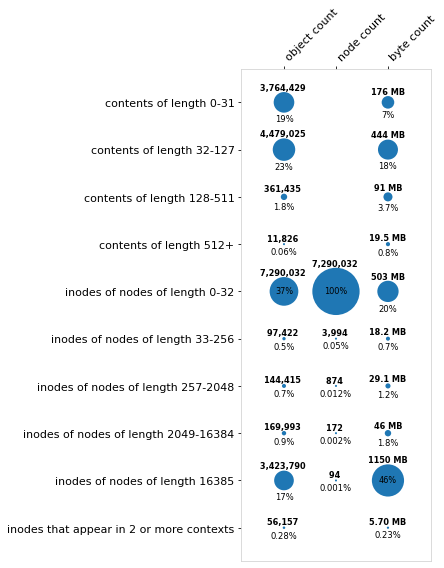

In [2]:
plot_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv', 'ekind')

💡 94 nodes have a length greater than 16k, they make up 46% of the bytes of the tree.

💡 Almost all nodes are small (i.e. with a length of 32 or less)


### Objects Distance to Commit

The following plot groups the objects into 5 categories, depending on their distance to the commit of the tree.
For instance, `<1 cycle` implies that the objects in that row are less than 1 cycle away from the commit being analysed (i.e. less than 8200 blocks away, less than 3 days away).



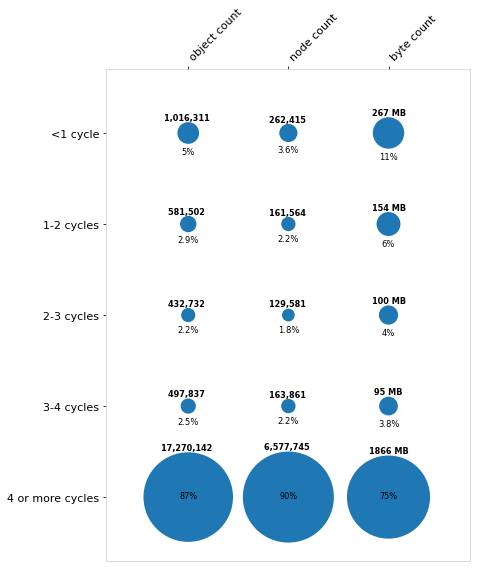

In [3]:
plot_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv', 'area_distance_from_origin')

💡 A single cycle doesn't modifies a lot the Irmin tree.


### Objects Path

The following plot groups the objects into 4 categories, depending on their ancestor directory.
    

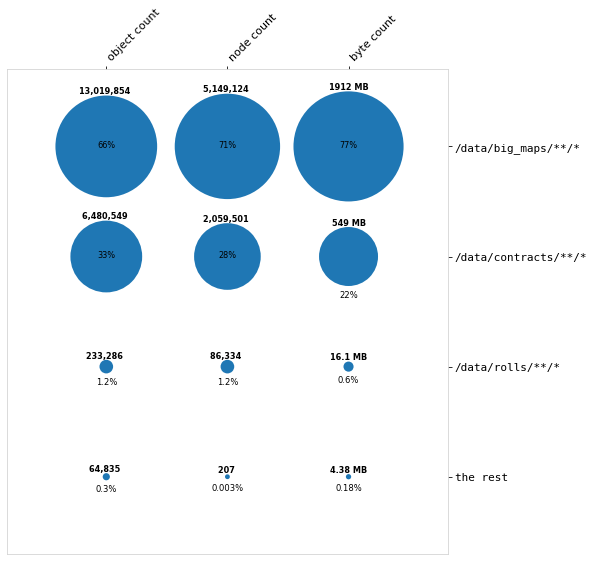

In [4]:
plot_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv', 'path2')

💡 Almost all the data is contained in `big_maps` and `contracts`.


The following plot groups the objects on 8 interesting locations.


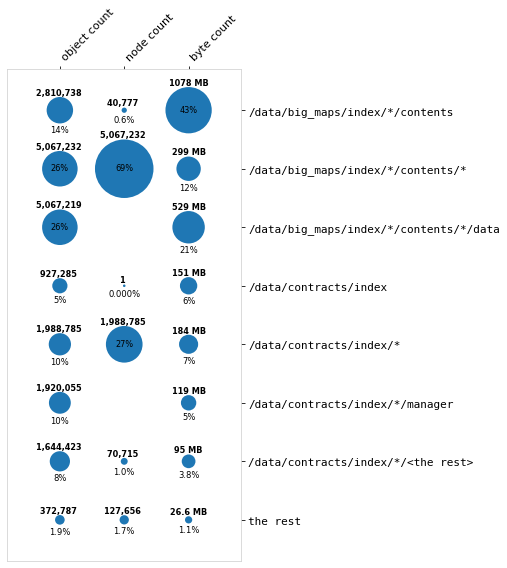

In [5]:
plot_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv', 'path3')

💡 The `/data/contracts/index` directory is made of nearly 1 million inodes. It points to nearly 2 million nodes (i.e. `/data/contracts/index/*`). (Technically it points to `2,003,307` nodes but only `1,988,785` objects due to sharing)



The following plot groups the objects on their precise location.


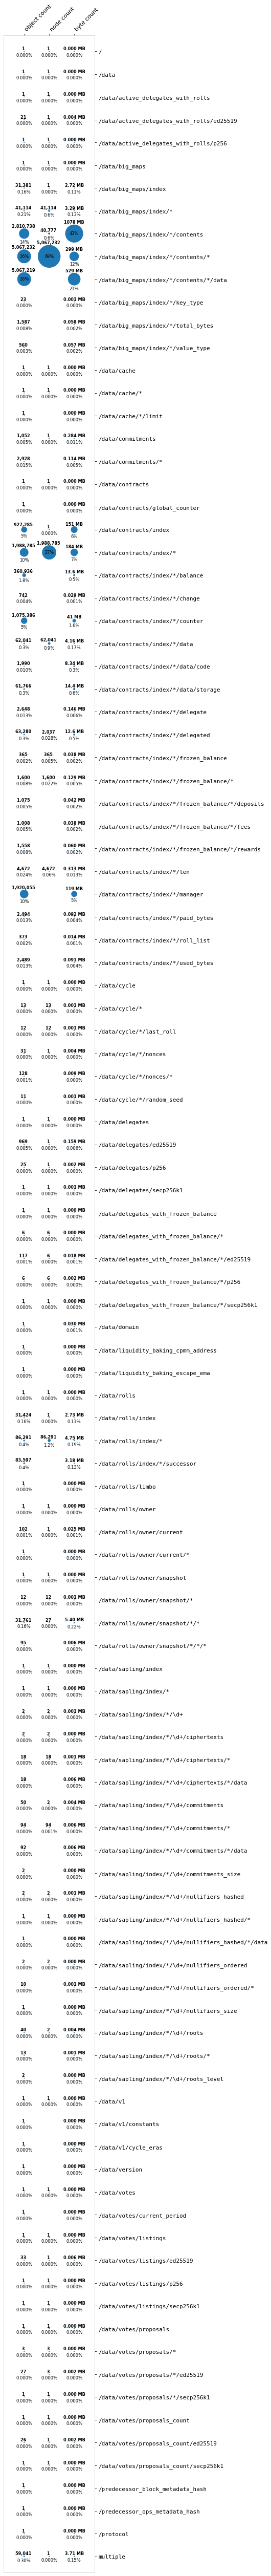

In [6]:
plot_vertical_bubble_histo('/tmp/tree_of_cycle_445.ipynb.csv', 'path')